# "Анализ оттока клиентов банка "Метанпром""

Ссылка на презентацию: <https://disk.yandex.ru/i/fg7I8ZbMSoXtqw>

**Введение.**

Мне, аналитику, задано провести аналитическое исследование информации о клиентах "Метанпромбанка", по результатам которого можно будет стабилизировать и уменьшить отток клиентов.

**Целью проекта** является исследовательский анализ информации о клиентах, для подготовки, на его основе, презентации для отдела маркетинга Метанпромбанка. Презентация должна содержать понятные и легко интерпретируемые графики, лаконичные и ёмкие выводы, а также компактные однородные сегменты клиентов с примерами мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся клиентов от оттока из банка.

**Задача проекта:**
* Проанализировать информацию о клиентах Метанпромбанка и выделить сегменты клиентов, которые склонны уходить из банка.
* Провести исследовательский анализ данных, определить все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравнить портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.д).
* Сформулировать и проверить статистические гипотезы.
    * Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
    * Сформулировать и проверить статистическую гипотезу относительно представленных данных, которая поможет  внести ясность в исследование.
* Объединяя признаки отточности, сформировать сегменты клиентов, отобрать из них лучшие и дать по ним рекомендации.
* По итогам исследования подготовить презентацию. Для создания презентации использовать любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf, прикрепив ссылку на файл в основном проекте.

**Описание данных.**

Датасет **/datasets/bank_scrooge.csv** содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки таблицы:
* USERID — идентификатор пользователя,
* score — баллы кредитного скоринга,
* city — город,
* gender — пол,
* age — возраст,
* equity — количество баллов собственности
* balance — баланс на счёте,
* products — количество продуктов, которыми пользуется клиент,
* credit_card — есть ли кредитная карта,
* last_activity — недавняя активность клиента,
* EST_SALARY — оценочный доход клиента,
* сhurn — признак оттока.

**Декомпозиция задачи.**(Этапы выполнения проекта).

* Шаг 1. Загрузка и описание данных.
    * Импорт необходимых библиотек.
    * Загрузка данных.
    * Описание данных.
    * Общая информация о датасете.
    * Значения какого типа хранятся в столбцах?
* Шаг 2. Подготовка данных.
    * Анализ природы пропусков и их разумная обработка.
    * Кодирование пропусков(для использования в анализе корреляции).
* Шаг 3. Разведочный анализ данных(EDA).
    * Анализ распределения признаков, в т.ч. в разрезе оттока клиентов.
    * Корреляционный анализ. Интерпретация.
* Шаг 4. Проверка статистических гипотез. Обоснование инструмента.
* шаг 5. Промежуточные итоги.
    * Выводы по результатам EDA.
    * Выводы на основе корреляционнгого анализа.
    * Выделение признаков, влияющих на отток клиентов.
* Шаг 6. Сегментация клиентов.
* Шаг 7. Приоритизация сегментов.
* Шаг 8. Формирование рекомендаций по работе с клиентами.
    * Подготовка презентации.

## Загрузка и описание данных.

### Импорт необходимых библиотек.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
# вывожу столбцы всей шириной
pd.set_option('display.max_colwidth', 25)
# вывожу строки большей высотой
pd.set_option('display.max_rows', 150)
# ограничу двумя число знаков при выводе дробных чисел
pd.set_option("display.float_format", "{:.2f}".format)

### Загрузка данных

In [2]:
try:
    metan = pd.read_csv('C:/datasets/bank_scrooge.csv')
except:
    metan = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

### Обзор данных.

In [3]:
metan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Вывод:** В таблице 12 стобцов и 10000 строк. Названия двух столбцов(USERID, EST_SALARY) не соответствуют стилю Python. В столбцах age и balance имеются пропуски. 

In [4]:
metan.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


#### Переименование столбцов.

Приведу названия столбцов к стилю Python и к общей логике данных:

In [5]:
metan = metan.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_income'})
metan.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


**Вывод:** Название столбцов USERID и EST_SALARY были приведены к стилю языка Python к общей логике данных: **user_id** и **est_income**.

### Общая информация о датасете.

In [6]:
metan['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [7]:
metan['gender'].unique()

array(['Ж', 'М'], dtype=object)

**Вывод:** В категориальном столбце city содержатся три значения - название городов: Рыбинск, Ярославль и Ростов. Столбец gender содержит два значения: Ж - женщина и М - мужчина.

In [8]:
metan['credit_card'].unique()

array([0, 1], dtype=int64)

In [9]:
metan['last_activity'].unique()

array([1, 0], dtype=int64)

In [10]:
metan['churn'].unique()

array([1, 0], dtype=int64)

**Вывод:** В бинарных столбцах credit_card, last_activity и churn содержится по два значения: 0 - отрицание факта наличия кредитной карты, недавней активности, оттока клиента;  и 1 - подтверждение факта наличия кредитной карты, недавней активности, оттока клиента.

#### Значения какого типа хранятся в столбцах?

In [11]:
metan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_income     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Вывод:** В целом по таблице нет конфликтов типов данных с содержанием, но для удобства в работе я преобразую тип данных в столбце user_id из целочисленных(int) в object и в столбце age из дробных(числа с плавающей запятой) в целочисленные(int). Правда, в столбце age эта операция станет возможной только после удаления, или заполнения пропусков. 

In [12]:
metan['user_id'] = metan['user_id'].astype(object)
metan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  object 
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_income     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 937.6+ KB


#### Взгляд на данные metan через визуализацию:

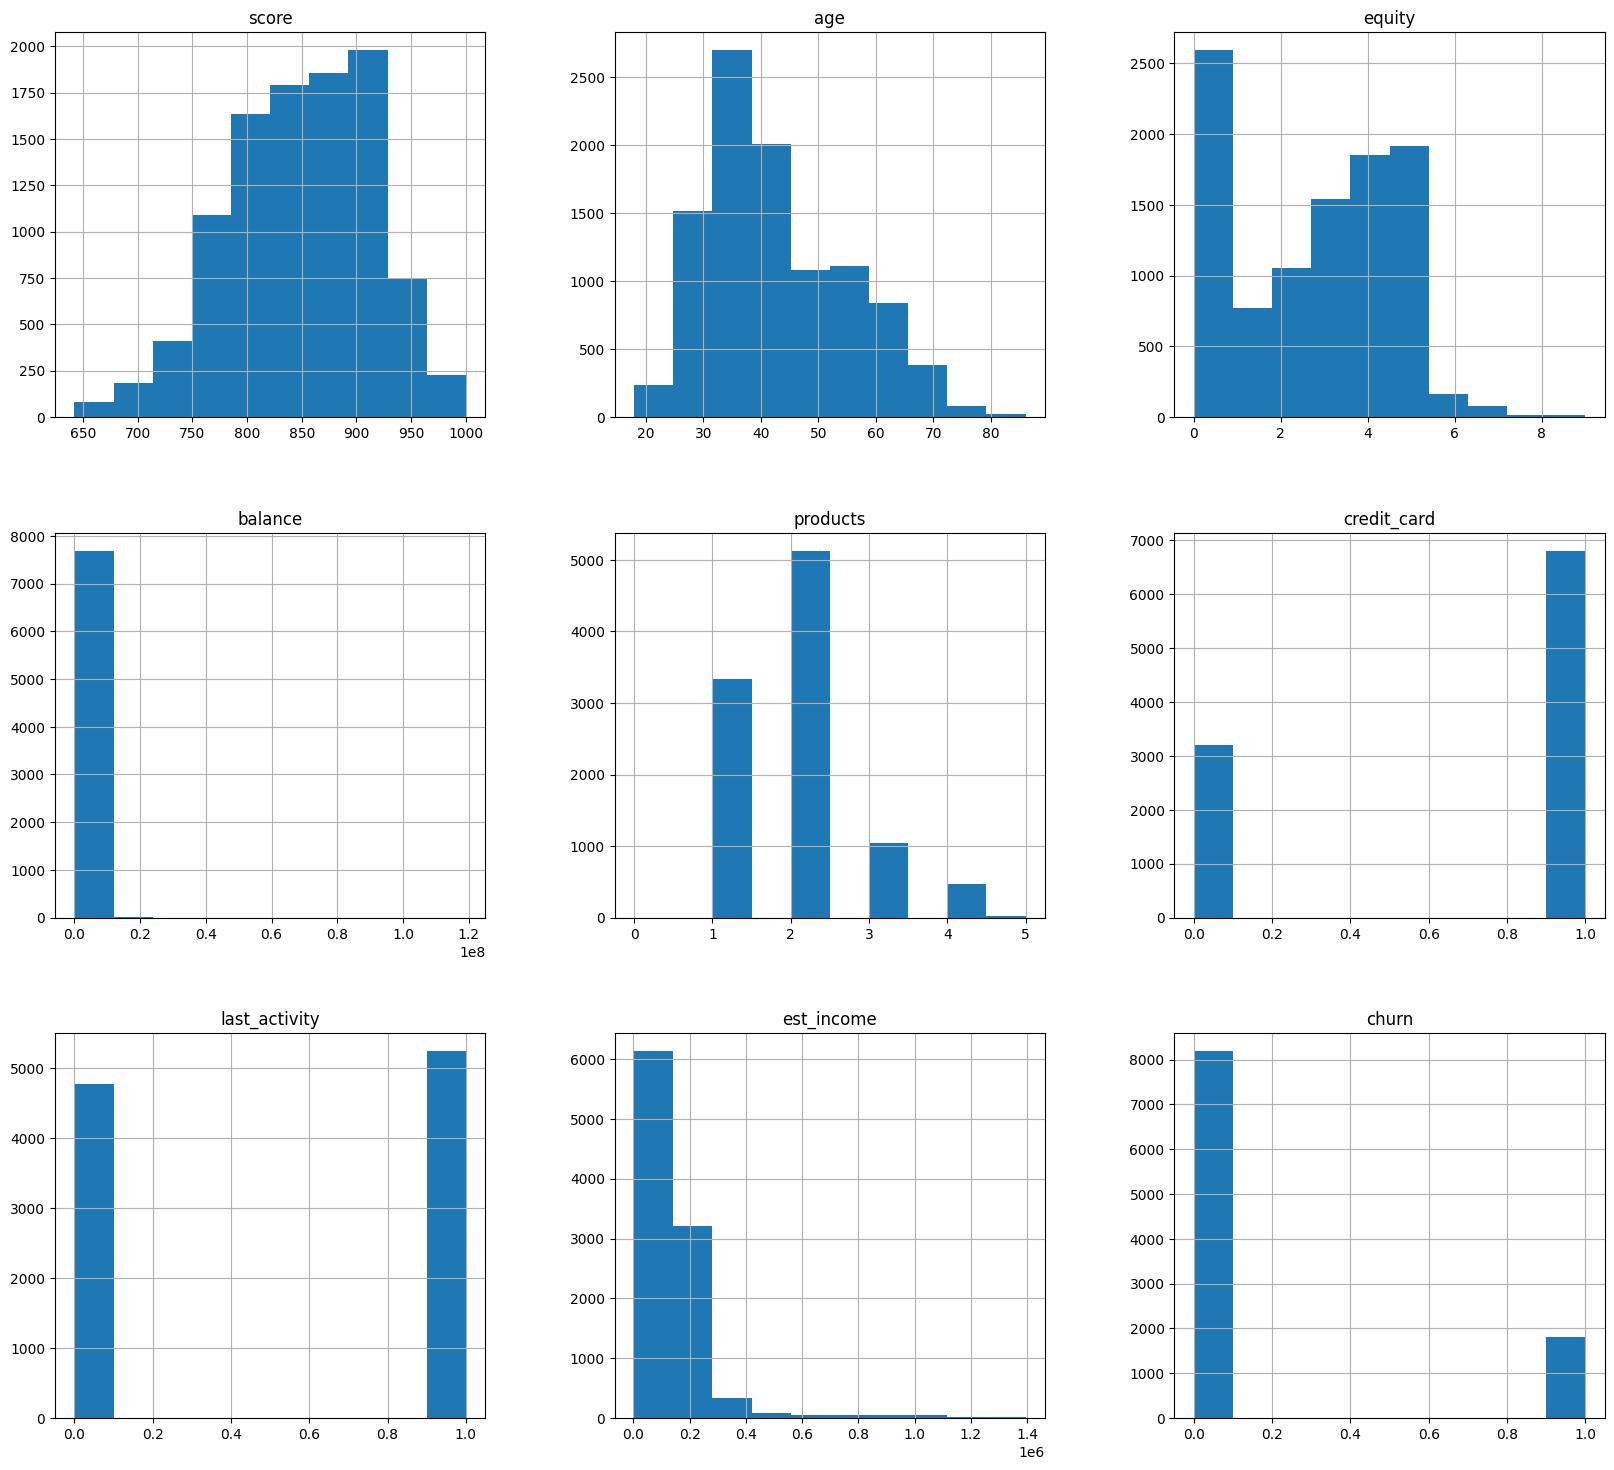

In [13]:
metan.hist(figsize=(20,18))
plt.show()

**Вывод:** Быстрый взгляд на данные metan с помощью гистограмм показывает, что: 
* Таблица содержит три бинарных столбца: credit_card, last_activity, churn;
* Кредитный скоринг нормально распределён от 600 до 1000 баллов;
* Возраст распределён от 18 до почти 90 лет;
* Баллы собственности распределены от нуля до девяти;
* Баланс счёта распределён от нуля до чуть больше 100 миллионов. И здесь возникает первое тревожное наблюдение: отрицательных значений баланса нет? А где же должники?;
* Банковские продукты распределены дискретно от нуля до пяти;
* Оценочный доход распределён от нуля до 1,4 миллиона.

## Подготовка данных.

### Изучение данных.

In [14]:
metan.describe()

,score,age,equity,balance,products,credit_card,last_activity,est_income,churn
count,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


#### Поиск артефактов.

При ознакомлении с таблицей внимание привлекает минимальное значение в столбце **products** равное **0**.

In [15]:
metan['products'].describe()

count   10000.00
mean        1.87
std         0.79
min         0.00
25%         1.00
50%         2.00
75%         2.00
max         5.00
Name: products, dtype: float64

У клиента банка, по определению, количество продуктов отличается от нуля. Интересно посмотреть на строки с нулевым  значением products:

In [16]:
metan[metan['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
8957,147837,962.00,Рыбинск,Ж,79.00,3,NaN,0,0,0,25063.96,1


**Вывод:** Нулевое количество продуктов(products), отсутствие активностей в последнем месяце(last_activity) и неизвестное значение баланса(balance), говорят о том, что клиент перестал пользоваться услугами банка. Он ушёл. Момент нашего анализа предшествует уходу клиента из банка, поэтому данную строку необходимо удалить.

In [17]:
metan = metan[metan['products']!=0]
metan['products'].describe()

count   9999.00
mean       1.87
std        0.79
min        1.00
25%        1.00
50%        2.00
75%        2.00
max        5.00
Name: products, dtype: float64

**Вывод:** В ходе обзора данных была обнаружена строка с данными об ушедшем клиенте. Данная информация вне момента нашего исследования, поэтому эта строка была удалена. Теперь products.min()=1, что правильно.

#### Поиск дубликатов.

Проверю наличие полных дубликатов

In [18]:
metan.duplicated().sum()

0

**Вывод:** В таблице metan не обнаружены полные дубликаты.

Проверю наличие дубликатов в столбце user_id:

In [19]:
metan['user_id'].duplicated().sum()

73

In [20]:
(metan['user_id'].duplicated().sum() / len(metan)).round(4) * 100

0.73

**Вывод:** В столбце user_id обнаружено 73 дубликата. Количество небольшое, составляет менее 1% всех данных, однако перед тем как решить удалить или нет, надо расмотреть эти строки и их содержание.

In [21]:
metan.loc[metan.duplicated(subset=['user_id'], keep=False)].head(50)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
7,218868,825.00,Ярославль,Ж,38.00,4,458145.40,2,1,1,68085.48,0
58,164676,860.00,Ярославль,М,37.00,5,648594.03,2,1,1,213586.86,1
150,185748,850.00,Рыбинск,М,36.00,5,1203376.67,2,0,1,89401.82,1
161,197364,928.00,Рыбинск,Ж,53.00,6,1347183.86,2,0,1,168189.49,1
231,190253,823.00,Рыбинск,М,37.00,4,373348.39,2,0,1,131947.92,1
431,214031,856.00,Рыбинск,М,36.00,2,386426.67,4,1,1,72767.85,0
440,221197,663.00,Рыбинск,М,27.00,0,NaN,1,1,1,172573.13,0
690,152479,768.00,Рыбинск,Ж,42.00,0,126787.79,4,1,1,143233.23,1
790,170312,901.00,Ярославль,М,33.00,4,3276783.93,3,0,1,358700.96,1
869,210662,962.00,Ярославль,Ж,54.00,5,5069231.39,1,1,1,955144.85,1


Изучу первые 12 пар строк из 73.

In [22]:
metan.loc[metan['user_id']==218868]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
7,218868,825.00,Ярославль,Ж,38.00,4,458145.40,2,1,1,68085.48,0
5470,218868,827.00,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0


In [23]:
metan.loc[metan['user_id']==164676]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
58,164676,860.00,Ярославль,М,37.00,5,648594.03,2,1,1,213586.86,1
7271,164676,790.00,Рыбинск,Ж,77.00,1,111202.01,1,1,0,32835.45,0


In [24]:
metan.loc[metan['user_id']==185748]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
150,185748,850.00,Рыбинск,М,36.00,5,1203376.67,2,0,1,89401.82,1
3106,185748,912.00,Ярославль,Ж,47.00,5,1598218.98,2,0,0,180256.98,0


In [25]:
metan.loc[metan['user_id']==197364]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
161,197364,928.00,Рыбинск,Ж,53.00,6,1347183.86,2,0,1,168189.49,1
4870,197364,889.00,Ярославль,М,33.00,0,NaN,2,1,1,96173.48,0


In [26]:
metan.loc[metan['user_id']==190253]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
231,190253,823.00,Рыбинск,М,37.00,4,373348.39,2,0,1,131947.92,1
1583,190253,726.00,Ярославль,М,49.00,0,NaN,1,1,1,177700.78,0


In [27]:
metan.loc[metan['user_id']==214031]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
431,214031,856.00,Рыбинск,М,36.00,2,386426.67,4,1,1,72767.85,0
7409,214031,777.00,Ярославль,М,NaN,2,171510.23,1,1,1,75409.63,0


In [28]:
metan.loc[metan['user_id']==152479]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
690,152479,768.00,Рыбинск,Ж,42.00,0,126787.79,4,1,1,143233.23,1
5705,152479,723.00,Ярославль,Ж,22.00,0,NaN,1,1,0,83955.65,0


In [29]:
metan.loc[metan['user_id']==170312]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
790,170312,901.00,Ярославль,М,33.00,4,3276783.93,3,0,1,358700.96,1
3039,170312,813.00,Рыбинск,Ж,47.00,3,370027.67,2,0,0,129835.56,0


In [30]:
metan.loc[metan['user_id']==210662]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
869,210662,962.00,Ярославль,Ж,54.00,5,5069231.39,1,1,1,955144.85,1
1837,210662,896.00,Рыбинск,Ж,37.00,0,NaN,2,0,0,90916.04,0


In [31]:
metan.loc[metan['user_id']==131419]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
904,131419,934.00,Ярославль,М,35.00,5,2348335.95,2,0,0,217105.13,1
2138,131419,739.00,Рыбинск,Ж,37.00,3,1307941.65,3,0,0,103867.47,0


In [32]:
metan.loc[metan['user_id']==187635]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn
918,187635,918.00,Ярославль,Ж,44.00,0,NaN,1,1,1,162497.52,0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0


**Вывод:** Изучение пар строк с одинаковыми **user_id** наводит на мысль о технической неполадке из-за которой в какие-то временные отрезки система учёта в офисах банка в городах Рыбинск и Ярославль оказались рассинхронизироваными и при регистрации, разным людям, в разных городах, был присвоен один и тот же user_id. Интересно что эта техническая неполадка не затронула город Ростов. Эти строки не являются в полном смысле строками дубликатами, в каждой из этих строк данные о конкретном клиенте банка и **на этом основании принимаю решение их не удалить.**

#### Поиск пропусков.

Выведу количество пропусков по столбцам

In [33]:
metan.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
est_income          0
churn               0
dtype: int64

 Выведу процент пропусков по столбцам

In [34]:
(metan.isna().sum() / len(metan)).round(4) * 100

user_id          0.00
score            0.00
city             0.00
gender           0.00
age              0.26
equity           0.00
balance         22.94
products         0.00
credit_card      0.00
last_activity    0.00
est_income       0.00
churn            0.00
dtype: float64

Пропуски в столбце age составляют 0,26% от общего количества строк и их удаление не исказит результаты исследования. Принимаю решение удалить.

In [35]:
metan.dropna(subset = ['age'], inplace = True)

После удаления пропусков в столбце age, стало возможно изменить тип данных age на целочисленный int.

In [36]:
metan['age'] = metan['age'].astype(int)
metan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   object 
 1   score          9973 non-null   float64
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int32  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_income     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(3), int32(1), int64(5), object(3)
memory usage: 973.9+ KB


**Вывод:** 
* В столбце age - возраст, обнаружено 26 пропусков, что составляет 0,26% от общего числа значений и не имеет решающего значения для нашего исследования. Эти строки были удалены. После удаления пропусков в столбце age, стало возможно изменить тип данных age на целочисленный int. Результат данной операции понадобится для дальнейших вычислений. 
* В столбце balance - баланс счёта, обнаружено 2294 пропущенных значений, что составляет 22,94% от общего числа значений. Такую долю пропусков удалить некорректно. Замена медианой или средним значением может привести к искажению результатов анализа, поэтому буду изучать природу этих пропусков и их возможную связь с другими значениями. Возможно, именно в этих значениях содержится важная информация для нашего исследования. 

### Анализ природы пропусков и их разумная обработка.

С помощью метода describe() сделаю сравнение двух таблиц: metan и таблицы состоящей из строк с пропусками.

In [37]:
# описание таблицы metan
display(metan.describe())

,score,age,equity,balance,products,credit_card,last_activity,est_income,churn
count,9973.00,9973.00,9973.00,7695.00,9973.00,9973.00,9973.00,9973.00,9973.00
mean,848.67,42.73,2.63,827245.59,1.87,0.68,0.52,147799.12,0.18
std,65.39,12.18,1.98,1980327.41,0.79,0.47,0.50,139287.08,0.39
min,642.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00
25%,802.00,33.00,0.00,295698.71,1.00,0.00,0.00,75252.02,0.00
50%,853.00,40.00,3.00,524295.33,2.00,1.00,1.00,119643.06,0.00
75%,900.00,51.00,4.00,980051.21,2.00,1.00,1.00,174499.96,0.00
max,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


Выведу описание той части таблицы metan где содержатся только строки с пропусками:

In [38]:
metan[metan['balance'].isna()].describe()

,score,age,equity,balance,products,credit_card,last_activity,est_income,churn
count,2278.00,2278.00,2278.00,0.00,2278.00,2278.00,2278.00,2278.00,2278.00
mean,865.31,42.08,0.05,NaN,1.16,0.82,0.55,226433.78,0.01
std,89.55,11.92,0.22,NaN,0.40,0.39,0.50,199824.93,0.07
min,642.00,18.00,0.00,NaN,1.00,0.00,0.00,20274.03,0.00
25%,871.00,33.00,0.00,NaN,1.00,1.00,0.00,120269.55,0.00
50%,903.00,40.00,0.00,NaN,1.00,1.00,1.00,174354.23,0.00
75%,922.00,49.00,0.00,NaN,1.00,1.00,1.00,240396.96,0.00
max,990.00,86.00,1.00,NaN,3.00,1.00,1.00,1333687.36,1.00


**Вывод:** Сравнение позволяет увидеть что клиенты в строках с пропусками, по сравнению с клиентами во всей таблице:
* как правило, не имеют объектов в собственности(min, Q1, Q2, Q3 equity равны 0);
* чаще всего пользуются только одным продуктом(min, Q1, Q2, Q3 products равны 1);
* чаще имеют в пользовании кредитную карту(среднее значение 0,82 > 0,68);
* имеют более высокий доход(среднее значение est_salary 226433 > 147799);
* и главное, намного реже уходят с банка: среднее значение churn в 18 раз меньше(0,01 против 0,18).

Похоже, имеется некая связь пропущенных значений с другими значениями в своей строке. 

**Выясню, существует ли связь между пропущенными значениями balance и призраком оттока клиента churn:**

In [39]:
metan[metan['balance'].isna()]['churn'].value_counts()

churn
0    2266
1      12
Name: count, dtype: int64

**Вывод:** Те клиенты, у которых пропущенное значение balance в 2266 случаях из 2278(99,47%) не показывают признаков оттока из банка. Считаю, что для результатов исследования очень важно эти строки не удалять.

**Выясню, существует ли связь между пропущенными значениями balance и гендерной принадлежностью клиента gender:**

In [40]:
metan[metan['balance'].isna()]['gender'].value_counts()

gender
М    1272
Ж    1006
Name: count, dtype: int64

**Вывод:** По столбцу gender особой связи с пропусками не обнаружено.

**Выясню, существует ли связь между пропущенными значениями balance и количеством банковских продуктов у клиента products:**

In [41]:
metan[metan['balance'].isna()]['products'].value_counts()

products
1    1934
2     315
3      29
Name: count, dtype: int64

**Вывод:** По столбцу products обнаружена особая связь с пропусками: большинство пропущенных значений(85%) приходится на тех клиентов, у которых только один продукт банка.

**Выясню, существует ли связь между пропущенными значениями balance и наличием кредитной карты банка у клиента:**

In [42]:
metan[metan['balance'].isna()]['credit_card'].value_counts()

credit_card
1    1858
0     420
Name: count, dtype: int64

**Вывод:** По столбцу credit_card тоже обнаружена особая связь с пропусками: большинство пропущенных значений(81,6%) приходится на тех клиентов, у которых имеется кредитная карта банка.

**Выясню, существует ли связь между пропущенными значениями balance одновременно с количеством продуктов у клиента и с наличием кредитной карты банка у клиента:**

In [43]:
metan[metan['balance'].isna()][['products', 'credit_card']].value_counts()

products  credit_card
1         1              1585
          0               349
2         1               257
          0                58
3         1                16
          0                13
Name: count, dtype: int64

In [44]:
metan['balance'].describe()

count        7695.00
mean       827245.59
std       1980327.41
min             0.00
25%        295698.71
50%        524295.33
75%        980051.21
max     119113552.01
Name: balance, dtype: float64

**Вывод:** Удалось выяснить причину пропусков в столбце balance: 
* В 69,7% этих строк содержатся данные о клиентах пользующихся только одным продуктом: и этот продукт - кредитная карта. 
* С большой долей вероятности, в ячейках с пропусками на момент исследования содержался **отрицательный баланс**. Отрицательное значение balance было интерпретировано как "нет данных". Это подтверждается и тем что в таблице metan минимальное значение balance равно нулю, то есть, в исходной таблице отсутствует информация об отрицательных значениях баланса счёта, значит о долгах клиентов.

Пропуски в столбце balance таблицы metan подходят для класса MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям. 

**В нашем исследовании удаление этих пропусков привело бы к потере данных о немалой группы клиентов(почти 23%), которая имеет задолженность перед банком, существенно активная(среднее last_activity=0.55) и лояльная к банку(средний churn=0.01), что однозначно исказило бы результаты исследования.**

#### Разумная обработка пропусков. 

Восстановить пропущенные значения balance (отрицательные значения), невозможно, но так как у нас есть существенное количество пропусков, можно создать отдельную категорию для пропущенных значений. Для начала создаю копию столбца balance. В новом столбце balance_2 сразу заполняю пропуски значением -1. Для кодирования пропусков создаю новый категориальный столбец **debt** c бинарными значениями 1 - есть отрицательный баланс; 0 - отрицательный баланс отсутствует. 

In [45]:
metan['balance_1'] = metan['balance'].fillna(-100)
metan.head(3)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn,balance_1
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,59214.82
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,850594.33
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,-100.00


####  Создание нового бинарного столбца на основе пропусков.

Объявляю функцию debt для обозначения факта наличия долга: 1- есть долг, 0- нет долга.

In [46]:
def is_debt(balance_1):
    """Функция возвращает два значения: 0 и 1 
    в зависимости от знака balance_2: минус или плюс.
    """
        
    if 0 > balance_1:
        return 1
    else:
        return 0

Применяю функцию is_debt и добавляю новый столбец is_debt.

In [47]:
metan['is_debt'] = metan['balance_1'].apply(is_debt)
metan.head(3)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn,balance_1,is_debt
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,59214.82,0
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,850594.33,0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,-100.00,1


**Вывод:** В ходе кодирования пропусков для использования в анализе корреляции, был создан новый категориальный столбец **is_debt** с бинарными значениями: 0 - нет долга, 1 - есть долг.

### Кодирование данных (для использования в анализе корреляции).

#### Кодирование столбцов city  и gender.

Для дальнейшего анализа с помощью корреляции, необходимо кодировать некоторые столбцы, то есть перевести категориальные значения в бинарные. Начинаю со столбцов city и gender. Для этого создаю копии этих столбцов. 

In [48]:
metan['city_2'] = metan['city']
metan['gender_2'] = metan['gender']
metan.head(3)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn,balance_1,is_debt,city_2,gender_2
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,59214.82,0,Рыбинск,Ж
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,850594.33,0,Рыбинск,Ж
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,-100.00,1,Рыбинск,Ж


Для кодирования использую метод get_dummies()

In [49]:
metan = pd.get_dummies(metan, columns = ['city_2', 'gender_2'])

In [50]:
metan = metan.rename(columns = ({'city_2_Ростов':'rostov', 
                                 'city_2_Рыбинск':'rybinsk', 
                                 'city_2_Ярославль':'yaroslavl', 
                                 'gender_2_Ж':'female', 'gender_2_М':'male'}))
metan.head(3)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_income,churn,balance_1,is_debt,rostov,rybinsk,yaroslavl,female,male
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,59214.82,0,False,True,False,True,False
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,850594.33,0,False,True,False,True,False
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,-100.00,1,False,True,False,True,False


**Вывод:** В ходе кодирования значений для использования в анализе корреляции, были созданы пять новых бинарных столбцов: **female, male, rostov, rybinsk, yaroslavl** с целью использования их в корреляционном анализе.

In [51]:
metan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   object 
 1   score          9973 non-null   float64
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int32  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_income     9973 non-null   float64
 11  churn          9973 non-null   int64  
 12  balance_1      9973 non-null   float64
 13  is_debt        9973 non-null   int64  
 14  rostov         9973 non-null   bool   
 15  rybinsk        9973 non-null   bool   
 16  yaroslavl      9973 non-null   bool   
 17  female         9973 non-null   bool   
 18  male         

## Разведочный анализ данных(EDA).

### Анализ распределения признаков, в т.ч. в разрезе оттока клиентов.

Анализ распределения в зависимости от типа данных имеет цель:
        
 1. Для непрерывных признаков: анализ должен показать интервалы признака, на которых отток выше, чем лояльность;

 2. Для категориальных/дискретных признаков: анализ должен выявить, какое(какие) из значений категориального признака более или менее склонно к оттоку. 
        
Тут сразу хочется акцентировать внимание на визуализации, которая поможет:
 1. Находить границы интервалов буду с помощью 'sns.histplot' с параметрами 'hue' и настройками 'stat="density' и  'common_norm=False'; 
 
 2. При использовании гистограмм постараюсь подобрать оптимальное значение корзин, чтобы на графике не было провалов между     столбиками - обычно оптимальный размер корзин оценивается как разница между максимальным и минимальным значением    признака плюс один;

 3. При анализе дискретных или закодированных категориальных признаков буду использовать 'barplot()', передав параметру 'x' анализируемый признак, а параметру 'y' - признак оттока. Также важно построить на нём 'plt.axhline()' со средним уровнем оттока - по нему мы будем определять, что значение признака более склонно к оттоку (если уровень оттока признака выше, чем в среднем по банку - считаем, что признак влияет сильно). Такие графики более информативны, чем обычные гистограммы с анализом абсолютных значений, также они более понятны и интерпретируемы для бизнеса.

#### Анализ распределения значений кредитного скоринга клиента,  score в разрезе оттока, churn.

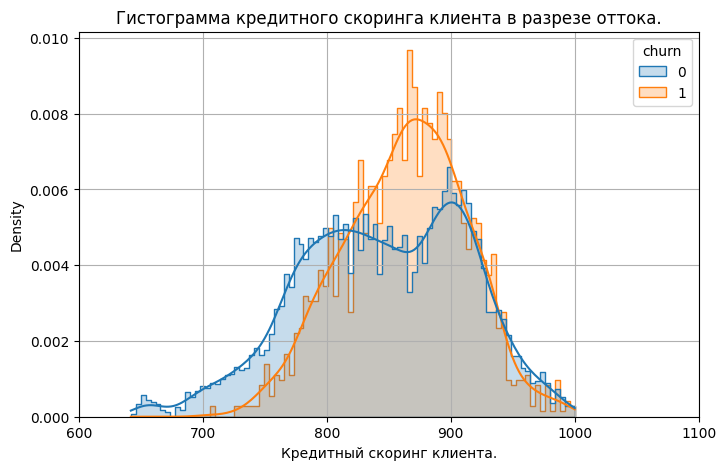

In [52]:
# seaborn histogram
plt.figure(figsize=(8, 5))
plt.grid()
sns.histplot(metan, x="score", hue="churn", element="step", bins=90,
             stat="density", common_norm=False, kde=True)
plt.xlim(600, 1100)
# добавляю заголовок и подписи осей
plt.title('Гистограмма кредитного скоринга клиента в разрезе оттока.')
plt.xlabel('Кредитный скоринг клиента.')
plt.show()

In [53]:
metan_score = metan.query('850 < score < 910')
print(f'Сколько в этом отрезке клиентов? {len(metan_score)}.')
print(f'Какой средний отток в этом отрезке? {round(metan_score["churn"].mean(), 2)}.')

Сколько в этом отрезке клиентов? 3187.
Какой средний отток в этом отрезке? 0.25.


**Вывод:** На гистограмме score виден участок где преобладает признак оттока, эток отрезок score между значениями 850 и 910 баллов. С помощью метода query() отфильтровал эту часть таблицы и сохранил в новую переменную **metan_score**. В этом отрезке содержится информация о 3187 клиентах банка. В данном отрезке средний уровень оттока равен 0,25 и больше среднебанковского(0,18).

#### Анализ распределения значений оценочного дохода клиента,  est_income в разрезе оттока, churn.

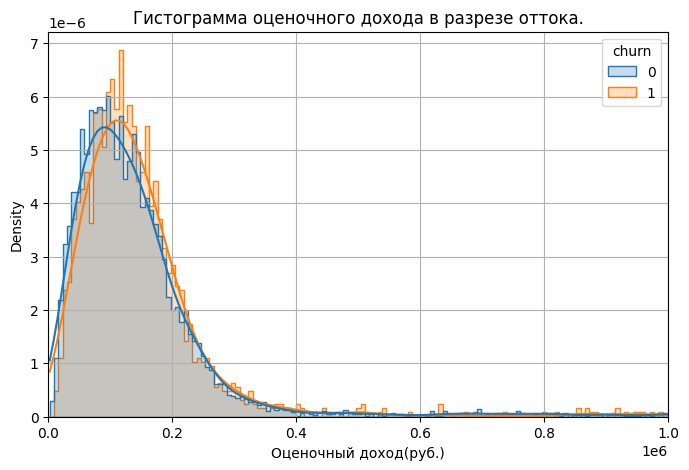

In [54]:
# seaborn histogram
plt.figure(figsize=(8, 5))
plt.grid()
sns.histplot(metan, x="est_income", hue="churn", element="step", bins=200, 
             stat="density", common_norm=False, kde=True)
plt.xlim(0, 1000000)
# добавляю заголовок и подписи осей            
plt.title('Гистограмма оценочного дохода в разрезе оттока.')
plt.xlabel('Оценочный доход(руб.)')
plt.show()

**Вывод:**

Выбираю отрезок с наибольшим churn:

In [55]:
metan_income = metan.query('110000 < est_income < 210000')
print(f'Сколько в этом отрезке клиентов? {len(metan_income)}.')
print(f'Какой средний отток в этом отрезке? {round(metan_income["churn"].mean(), 2)}.')

Сколько в этом отрезке клиентов? 3972.
Какой средний отток в этом отрезке? 0.21.


**Вывод:** На гистограмме est_income виден участок где преобладает признак оттока, эток отрезок est_income между значениями 110 т.р.  и 210 т.р.. С помощью метода query() отфильтровал эту часть таблицы и сохранил в новую переменную **metan_income**. В этом отрезке содержится информация о 3972 клиентах банка. В данном отрезке средний уровень оттока равен 0,21 и больше среднебанковского(0,18).

#### Анализ распределения значений баланса счёта клиента,  balance в разрезе оттока, churn.

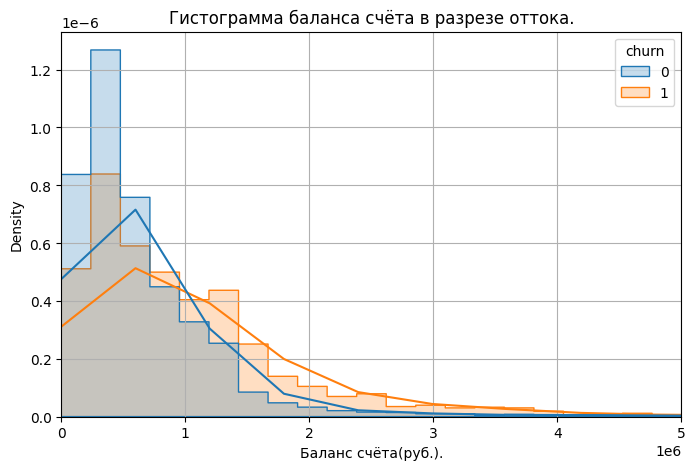

In [56]:
# seaborn histogram
plt.figure(figsize=(8, 5))
plt.grid()
sns.histplot(metan, x="balance", hue="churn", element="step", bins=500,
             stat="density", common_norm=False, kde=True)
plt.xlim(0, 5000000)
# добавляю заголовок и подписи осей 
plt.title('Гистограмма баланса счёта в разрезе оттока.')
plt.xlabel('Баланс счёта(руб.).')
plt.show()

In [57]:
metan_balance = metan.query('650000 < balance')
print(f'Сколько в этом отрезке клиентов? {len(metan_balance)}.')
print(f'Какой средний отток в этом отрезке? {round(metan_balance["churn"].mean(), 2)}.')

Сколько в этом отрезке клиентов? 3136.
Какой средний отток в этом отрезке? 0.33.


**Вывод:** На гистограмме balance виден участок где преобладает признак оттока, эток отрезок balance со значениями > 650 т.р. С помощью метода query() отфильтровал эту часть таблицы и сохранил в новую переменную metan_balance. В этом отрезке содержится информация о 3136 клиентах банка. В данном отрезке средний уровень оттока равен 0,33 и больше среднебанковского(0,18).

#### Анализ распределения значений возраста клиента,  age в разрезе оттока, churn.

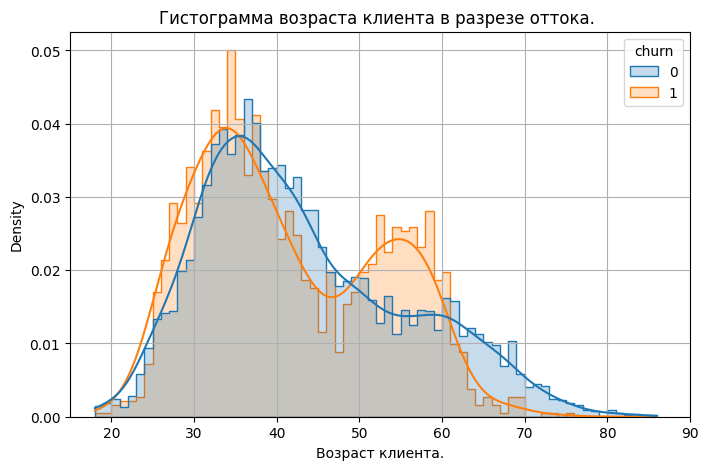

In [58]:
# seaborn histogram
plt.figure(figsize=(8, 5))
plt.grid()
sns.histplot(metan, x="age", hue="churn", element="step", bins=150, binwidth=1,
    stat="density", common_norm=False, kde=True)
plt.xlim(15, 90)
# добавляю заголовок и подписи осей
plt.title('Гистограмма возраста клиента в разрезе оттока. ')
plt.xlabel('Возраст клиента.')
plt.show()

**Вывод:** На гистограмме age видно два участка где преобладает признак оттока, первый отрезок age со значениями от 22 до 34 лет, второй отрезок включает значения age от 50 до 64 лет. Поэтому с возрастом поработаю с помощью двух отрезков metan_age_1 и metan_age_2.

Для первого отрезка metan_age_1:

In [59]:
# query
metan_age_1 = metan.query('21 < age < 35')
print(f'Сколько в этом отрезке клиентов? {len(metan_age_1)}.')
print(f'Какой средний отток в этом отрезке? {round(metan_age_1["churn"].mean(), 2)}.')

Сколько в этом отрезке клиентов? 2836.
Какой средний отток в этом отрезке? 0.22.


Для второго отрезка metan_age_2:

In [60]:
metan_age_2 = metan.query('49 < age < 65')
print(f'Сколько в этом отрезке клиентов? {len(metan_age_2)}.')
print(f'Какой средний отток в этом отрезке? {round(metan_age_2["churn"].mean(), 2)}.')

Сколько в этом отрезке клиентов? 2222.
Какой средний отток в этом отрезке? 0.23.


**Вывод:** Признак возраста, age, распределён так, что имеются два отрезка графика где преобладает признак оттока churn.  Первый отрезок age включает значения от 22 до 34 лет и второй отрезок включает значения от 50 до 63 лет. С помощью метода query() отфильтровал эти две части таблицы metan и сохранил в новые переменные metan_age_1 и metan_age_2. 
1. В отрезке metan_age_1 содержится информация о 2836 клиентах банка и наблюдается средний уровень оттока равен 0,22 и больше среднебанковского(0,18).
2. В отрезке metan_age_2 содержится информация о 2222 клиентах банка и наблюдается средний уровень оттока равен 0,23 и больше среднебанковского(0,18).

#### Анализ распределения значений баллов собственности клиента,  equity в разрезе оттока, churn.

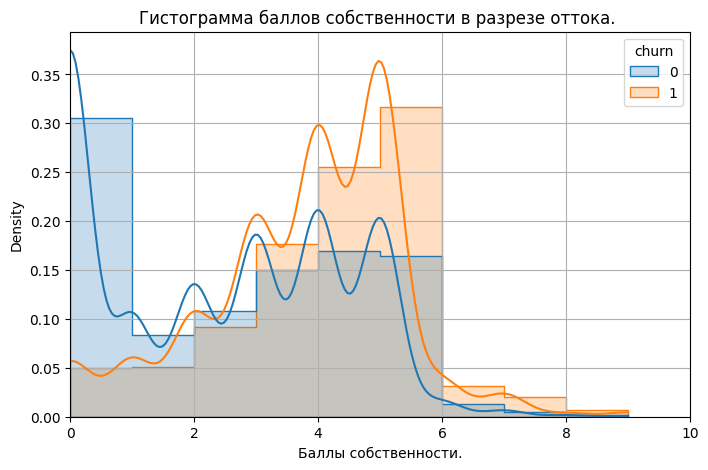

In [61]:
# seaborn histogram
plt.figure(figsize=(8, 5))
plt.grid()
sns.histplot(metan, x="equity", hue="churn", element="step", bins=10, binwidth=1,
    stat="density", common_norm=False, kde=True)
plt.xlim(0, 10)
# добавляю заголовок и подписи осей 
plt.title('Гистограмма баллов собственности в разрезе оттока. ')
plt.xlabel('Баллы собственности.')
plt.show()

In [62]:
metan_equity = metan.query('2 < equity')
print(f'Сколько в этом отрезке клиентов? {len(metan_equity)}.')
print(f'Какой средний отток в этом отрезке? {round(metan_equity["churn"].mean(), 2)}.')

Сколько в этом отрезке клиентов? 5573.
Какой средний отток в этом отрезке? 0.26.


**Вывод:** На гистограмме equity виден участок где преобладает признак оттока, эток отрезок equity со значениями больше одного балла недвижимости. С помощью метода query() отфильтровал эту часть таблицы и сохранил в новую переменную metan_equity. В этом отрезке содержится информация о 5573 клиентах банка. В данном отрезке средний уровень оттока равен 0,26 и больше среднебанковского(0,18).

#### Анализ распределения значений количества банковских продуктов у клиента,  products в разрезе оттока, churn.

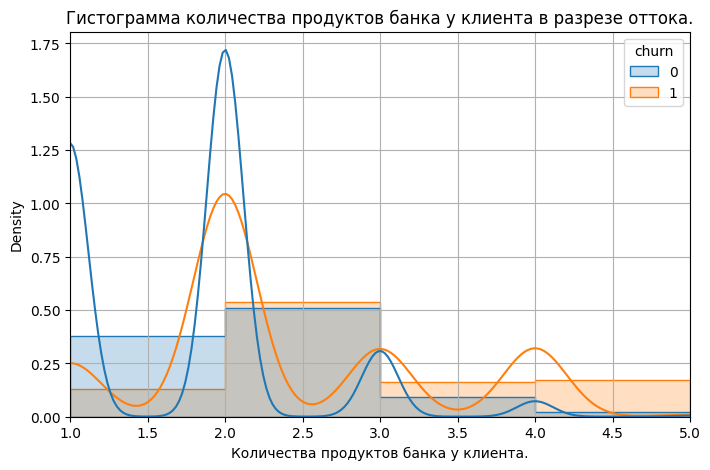

In [63]:
# seaborn histogram
plt.figure(figsize=(8, 5))
plt.grid()
sns.histplot(metan, x="products", hue="churn", element="step", bins=10, binwidth=1,
    stat="density", common_norm=False, kde=True)  
plt.xlim(1, 5)
# добавляю заголовок и подписи осей 
plt.title('Гистограмма количества продуктов банка у клиента в разрезе оттока.')
plt.xlabel('Количества продуктов банка у клиента.')
plt.show()

In [64]:
metan_products = metan.query('products > 1')
print(f'Сколько в этом отрезке клиентов? {len(metan_products)}.')
print(f'Какой средний отток в этом отрезке? {round(metan_products["churn"].mean(), 2)}.')

Сколько в этом отрезке клиентов? 6650.
Какой средний отток в этом отрезке? 0.24.


**Вывод:** На гистограмме products виден участок где преобладает признак оттока, эток отрезок products со значениями больше одного балла недвижимости. С помощью метода query() отфильтровал эту часть таблицы и сохранил в новую переменную metan_equity. В этом отрезке содержится информация о 6650 клиентах банка. В данном отрезке средний уровень оттока равен 0,24 и больше среднебанковского(0,18).

#### Анализ распределения значений отсутствие/наличие клиентской задолженности,  is_debt в разрезе оттока, churn.

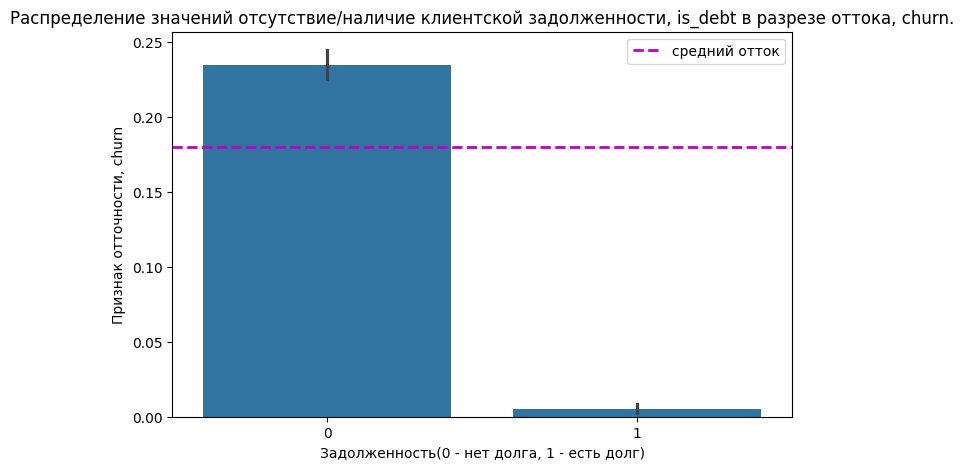

In [65]:
plt.figure(figsize=(8, 5))
sns.barplot(data=metan, x='is_debt', y='churn')

plt.axhline(y=0.18, linewidth=2, label= 'средний отток', color='m', linestyle='dashed')
plt.title('Распределение значений отсутствие/наличие клиентской задолженности, is_debt в разрезе оттока, churn.')
plt.xlabel('Задолженность(0 - нет долга, 1 - есть долг)')
plt.ylabel('Признак отточности, churn')
plt.legend()

plt.show()

In [66]:
display(metan.query('is_debt == 0')['churn'].describe())
metan.query('is_debt == 1')['churn'].describe()

count   7695.00
mean       0.23
std        0.42
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: churn, dtype: float64

count   2278.00
mean       0.01
std        0.07
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: churn, dtype: float64

**Вывод:** Очень интересно! 

Признак is_debt - наличие задолженности у клиента, имеет два значения: 
* 0 - отсутствие задолженности;
* 1 - наличие задолженности.

Относительно признака отточности is_debt распределён так: 
*  В отрезке "нет задолженности" содержится информация о 7695 клиентах банка и наблюдается средний уровень оттока равен 0,23 и больше среднебанковского(0,18).
*  В отрезке "наличие задолженности" содержится информация о 2278 клиентах банка и наблюдается средний уровень оттока равен 0,01 и в 18 раз меньше среднебанковского(0,18) и в 23 раза меньше чем у клиентов без задолженности. Существенная разница.

Вот и тут выявляется истина о том, что среди самых лояльных клиентов, самые лояльные - это те у кого есть задолженность. А ведь, действительно: как поменять банк, если имеется заолженность? Сначала надо поработать и погасить, а тем временем - лояльность высокая. 

Отсюда уже вижу рекомендацию: **Надо продвигать кредитные карты и кредиты среди клиентов с высоким кредитным скорингом, с хорошими баллами имущества, с подтверждённым доходом и с положительным балансом счёта. Простите, забегаю вперёд.**  

#### Анализ распределения значений  пола клиента, gender, в разрезе оттока, churn.

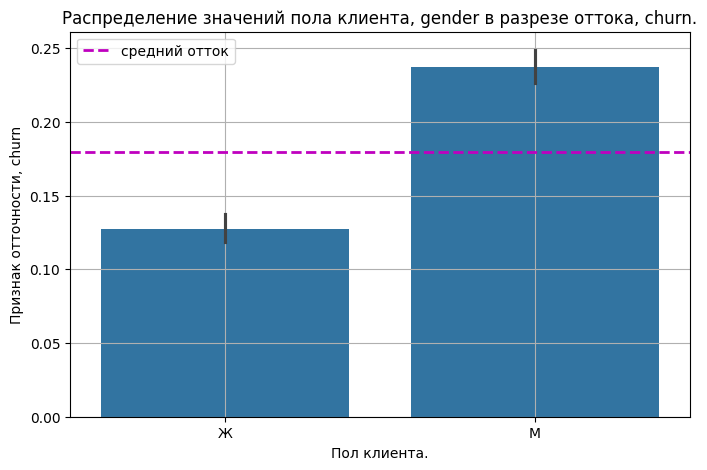

In [67]:
plt.figure(figsize=(8, 5))
sns.barplot(data=metan, x='gender', y='churn')
plt.axhline(y=0.18, linewidth=2, label= 'средний отток', color='m', linestyle='dashed')
plt.title('Распределение значений пола клиента, gender в разрезе оттока, churn.')
plt.xlabel('Пол клиента.')
plt.ylabel('Признак отточности, churn')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [68]:
display(metan.query('gender == "Ж"')['churn'].describe())
metan.query('gender == "М"')['churn'].describe()

count   4982.00
mean       0.13
std        0.33
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: churn, dtype: float64

count   4991.00
mean       0.24
std        0.43
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: churn, dtype: float64

**Вывод:** Очень интересно!

Признак gender, пол клиента имеет два значения:

* женский пол, Ж;
* мужской пол, М. 

Относительно признака отточности gender распределён так:
* В отрезке "Ж" содержится информация о 4982 клиентах банка и наблюдается средний уровень оттока равен 0,13 и меньше среднебанковского(0,18).
* В отрезке "М" содержится информация о 4991 клиентах банка и наблюдается средний уровень оттока равен 0,24 и больше среднебанковского(0,18).

То есть, по количеству отрезки равны, а по признаку оттока отличаются в два раза.

#### Анализ распределения значений наличия кредитной карты, credit_card, в разрезе оттока, churn.

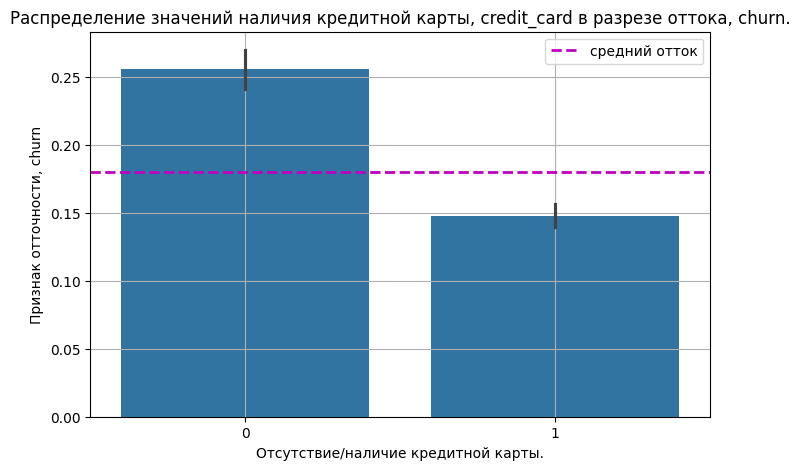

In [69]:
plt.figure(figsize=(8, 5))
sns.barplot(data=metan, x='credit_card', y='churn')
plt.axhline(y=0.18, linewidth=2, label= 'средний отток', color='m', linestyle='dashed')
plt.title('Распределение значений наличия кредитной карты, credit_card в разрезе оттока, churn.')
plt.xlabel('Отсутствие/наличие кредитной карты.')
plt.ylabel('Признак отточности, churn')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [70]:
display(metan.query('credit_card == 0')['churn'].describe())
metan.query('credit_card == 1')['churn'].describe()

count   3189.00
mean       0.26
std        0.44
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: churn, dtype: float64

count   6784.00
mean       0.15
std        0.35
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: churn, dtype: float64

**Вывод:**

Признак credit_card, наличие кредитной карты имеет два значения:

* 0 - отсутствие кредитной карты;
* 1 - наличие кредитной карты. 

Относительно признака отточности gender распределён так:
* В отрезке "отсутствие кредитной карты" содержится информация о 3189 клиентах банка и наблюдается средний уровень оттока равен 0,26 и больше среднебанковского(0,18).
* В отрезке "наличие кредитной карты" содержится информация о 6784 клиентах банка и наблюдается средний уровень оттока равен 0,15 и меньше среднебанковского(0,18).

Значит, клиенты с кредиткой лояльнее иных.

#### Анализ распределения значений города обслуживания клиента, city, в разрезе оттока, churn.

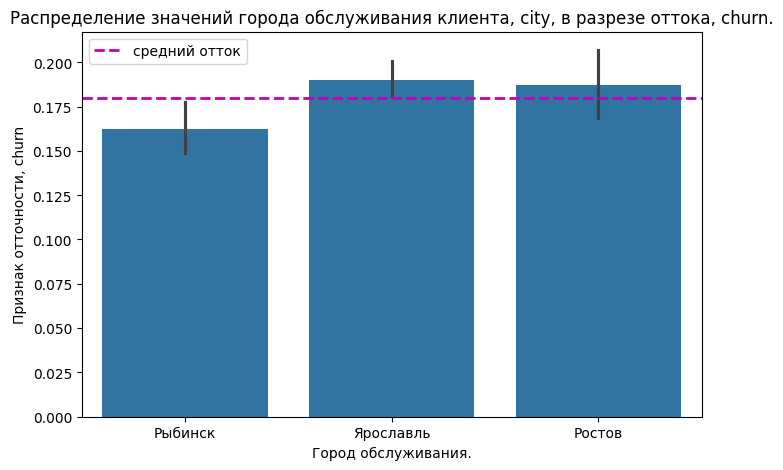

In [71]:
plt.figure(figsize=(8, 5))
sns.barplot(data=metan, x='city', y='churn')
plt.axhline(y=0.18, linewidth=2, label= 'средний отток', color='m', linestyle='dashed')
plt.title('Распределение значений города обслуживания клиента, city, в разрезе оттока, churn.')
plt.xlabel('Город обслуживания.')
plt.ylabel('Признак отточности, churn')
plt.legend()

plt.show()

In [72]:
display(metan.query('city == "Рыбинск"')['churn'].describe())
display(metan.query('city == "Ярославль"')['churn'].describe())
metan.query('city == "Ростов"')['churn'].describe()

count   2682.00
mean       0.16
std        0.37
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: churn, dtype: float64

count   5875.00
mean       0.19
std        0.39
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: churn, dtype: float64

count   1416.00
mean       0.19
std        0.39
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: churn, dtype: float64

**Вывод:**

Признак city, город обслуживания клиента имеет три значения:

* Рыбинск;
* Ярославль;
* Ростов.

Относительно признака отточности city распределён так:

* В отрезке "Рыбинск" содержится информация о 2682 клиентах банка и наблюдается средний уровень оттока равен 0,16 и меньше среднебанковского(0,18).
* В отрезке "Ярославль" содержится информация о 5875 клиентах банка и наблюдается средний уровень оттока равен 0,19 и больше среднебанковского(0,18).
* В отрезке "Ростов" содержится информация о 1416 клиентах банка и наблюдается средний уровень оттока равен 0,19 и больше среднебанковского(0,18).
То есть, по количеству отрезки не равны, по признаку оттока немного отличаются, но разница со среднебанковским уровнем не существенна. **Признак city не релевантен для сегментации.**

### Корреляционный анализ. Интерпретация.

#### Метод corr().

Чтобы анализировать как отток клиентов коррелирует с другими параметрами, построю тепловую карту с помощью методов heatmap() и data.corr() библиотеки seaborn.

Для изучения и визуализации корреляции исключу из таблицы два кодированных столбца city и gender. Дело в том, что в этих столбцах содержится недопустимый для метода corr() строковой тип данных string. Результат помещу в переменную metan_bank. 

In [73]:
metan_bank = metan.drop(columns=['city', 'gender'])

In [74]:
metan_bank.corr()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_income,churn,balance_1,is_debt,rostov,rybinsk,yaroslavl,female,male
user_id,1.00,0.01,0.02,0.01,0.01,-0.00,0.00,-0.03,-0.00,-0.01,0.00,0.00,-0.03,0.01,0.01,-0.03,0.03
score,0.01,1.00,-0.01,0.06,0.24,-0.00,-0.10,-0.03,0.16,0.11,0.14,0.14,-0.04,-0.00,0.03,-0.01,0.01
age,0.02,-0.01,1.00,0.02,0.07,0.02,-0.12,-0.01,-0.04,-0.05,0.07,-0.03,0.05,0.03,-0.06,0.21,-0.21
equity,0.01,0.06,0.02,1.00,0.16,0.43,-0.17,-0.00,-0.17,0.27,0.25,-0.71,0.04,-0.01,-0.02,0.02,-0.02
balance,0.01,0.24,0.07,0.16,1.00,0.08,-0.06,0.02,0.34,0.09,1.00,NaN,-0.04,-0.03,0.06,-0.05,0.05
products,-0.00,-0.00,0.02,0.43,0.08,1.00,-0.25,0.04,-0.12,0.30,0.16,-0.49,-0.01,-0.04,0.04,0.02,-0.02
credit_card,0.00,-0.10,-0.12,-0.17,-0.06,-0.25,1.00,-0.03,0.04,-0.13,-0.08,0.16,-0.10,-0.05,0.11,-0.13,0.13
last_activity,-0.03,-0.03,-0.01,-0.00,0.02,0.04,-0.03,1.00,0.00,0.17,0.02,0.03,0.01,0.05,-0.05,0.01,-0.01
est_income,-0.00,0.16,-0.04,-0.17,0.34,-0.12,0.04,0.00,1.00,0.00,0.16,0.31,-0.11,-0.06,0.13,-0.08,0.08
churn,-0.01,0.11,-0.05,0.27,0.09,0.30,-0.13,0.17,0.00,1.00,0.13,-0.25,0.01,-0.03,0.02,-0.14,0.14


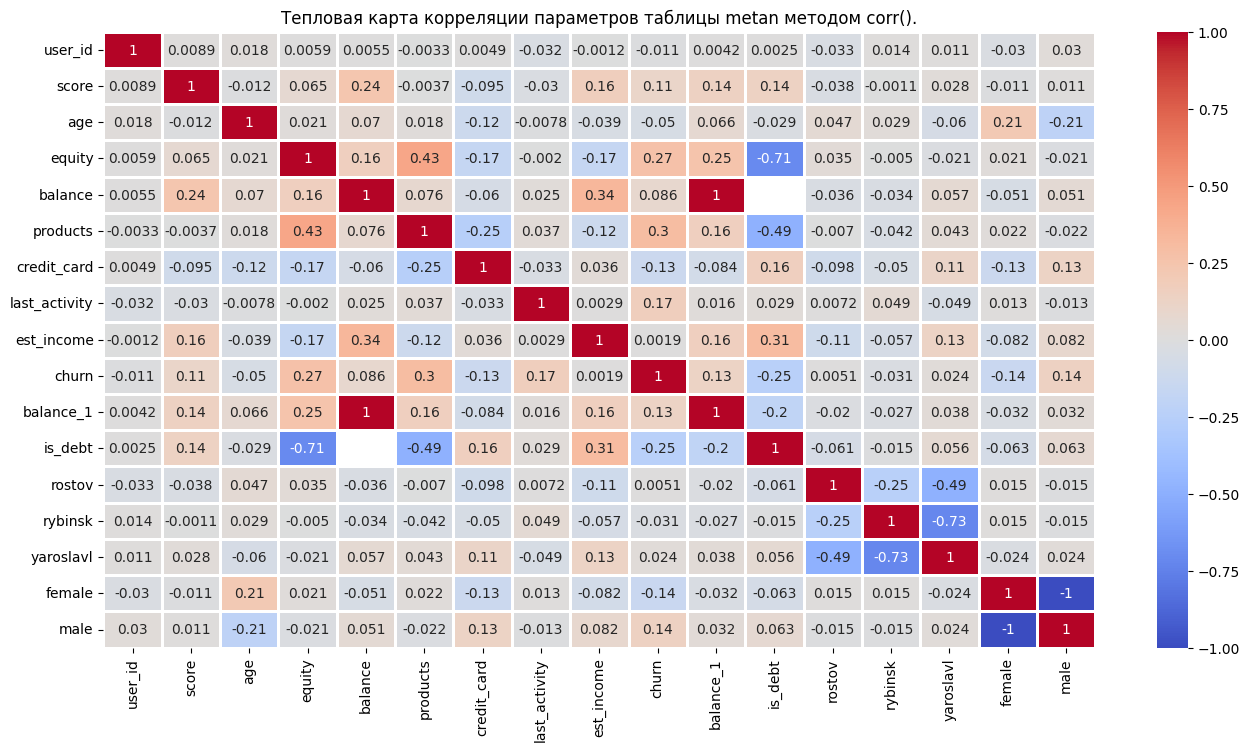

In [75]:
# seaborn heatmap()
plt.figure(figsize=(16,8))
sns.heatmap(metan_bank.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1)
# добавляю заголовок графика
plt.title('Тепловая карта корреляции параметров таблицы metan методом corr().')
plt.show()

**Вывод:** Тепловая карта позволила найти наибольшие значения корреляции параметров с признаком отточности:

* churn & equity = 0.27; здесь отражается очень слабая положительная корреляция между баллами собственности клиента и признаком отточности. 
* churn & products = 0.30; здесь отражается слабая положительная корреляция между количеством банковских продуктов у  клиента и признаком отточности. 
* churn & is_debt = минус 0.25; здесь отражается очень слабая корреляция, но подтверждается отрицательное направление корреляции между наличием долга у клиента и стремлением уйти с банка.

#### Интерпретация анализа корреляции.

Результаты корреляционного анализа очень интересны:
* наблюдается отсутствие зависимоти признака отточности от признаков: city - город обслуживания клиента,  и от признака est_income - оценочный доход клиента;
* наблюдается очень слабая зависимость признака отточности от last_activity - недавних активностей клиента, и от products - количество банковских продуктов у клиента;
* наблюдается слабая положительная связь между признаком отточности и equity - баллами собственности клиента, и от balance - балансом счёта клиента;
* и самой большой связью (0,38) с признаком отточности churn, оказалась интересная зависимость между состоянием баланса счёта клиента(**is_debt** - есть задолженность, нет задолженности), его баллами собственности (**equity**) и стремлением уйти в другой банк(**churn**):

    * Не было собстбенности(equity = 0), не было долга(баланс положительный), можно было уйти(churn стремился к 1);
    * Приобрёл собственность(equity > 0), появился долг(баланс отрицательный), надо остаться чтобы долг выплатить(churn стал равным 0), при этом появился как минимум один новый банковский продукт(кредит).

## Проверка статистических гипотез. Обоснование инструмента.

### Важность обоснования инструментария.

Про важность обоснования инструментария: обычно есть причины, по которым мы не можем использовать стандартный t-тест Стьюдента, и в блоке обоснования стоит начать с проверки этого условия - можем ли мы применять этот тест к нашим данным. Советую вспомнить про ЦПТ и влияние количества наблюдений на истинное среднее. Отмечу, что важно сначала убедиться, что ttest мы не можем использовать для проверки гипотез, прежде чем приступать к непараметрическим критериям - ttest более интерпретируемый и понятный для бизнеса, чем непараметрический тест Манна-Уитни, который работает с рангами, поэтому использование ttest должно быть в приоритете.

**Центральная предельная теорема** (ЦПТ) сокращённо  звучит так: сумма независимых одинаково распределённых случайных величин стремится к нормальному распределению по мере увеличения их количества.

In [76]:
len(metan[metan['churn']==0])

8155

In [77]:
len(metan[metan['churn']==1])

1818

Чтобы понять, можно ли применять t-тест, нужно проверить три условия:
1. Генеральные совокупности не зависят друг от друга:
* В нашем случае хоть выборки с одной таблицы, они содержат данные о разных, незнакомых между собой людях, со своими совершенно разными обстоятельствами.
2. Выборочные средние нормально распределены. Это условие не должно быть препятствием благодаря ЦПТ. Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. Это так, даже если сама генеральная совокупность не распределена нормально.
* В нашем случае выборки состоят из 8155 и 1818 значений.
3. Дисперсии рассматриваемых генеральных совокупностей равны. По умолчанию параметр equal_var=True: дисперсии считаются равными и тест объединяет обе выборки в одну, чтобы эту дисперсию поточнее оценить.При этом если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, то такой подход оправдан.
* В нашем случае можно считать дисперсии двух генеральных совокупностей равны.

**Вывод:** В нашем случае, применение t-тестов обоснованно.

### Выбор инструментария.

Я буду проверять гипотезы связаны с равенством средних значений двух генеральных совокупностей, они выглядят так:
* Гипотеза номер 1: Отличаются ли средние значения оценочного дохода лояльных и уходящих клиентов?
* Гипотеза номер 2: Cредние баллы собственности лояльных клиентов меньше средних баллов собственности уходящих клиентов.
* Гипотеза номер 3: Средний возраст среди лояльных клиентов равен 43 годам.

Для проверки гипотез номер 1 и номер 2, о равенстве среднего двух генеральных совокупностей по взятым из них выборкам я буду использовать имеющийся в Python специальный метод : **scipy.stats.ttest_ind(array1, array2, equal_var, alternative)**.

Для проверки гипотезы номер 3 о равенстве среднего генеральной совокупности некоторому значению я буду использовать имеющийся в Python метод **scipy.stats.ttest_1samp(a, popmean, alternative)**.

### Проверка статистических гипотез. 

**Гипотеза номер 1:** Отличаются ли средние значения оценочного дохода лояльных и уходящих клиентов?

Формулирую нулевую и альтернативную гипотезы.

Н0: Средний оценочный доход лояльных и уходящих клиентов равны.

Н1: Средний оценочный доход лояльных и уходящих клиентов не равны.

In [78]:
results = st.ttest_ind(
            metan[metan['churn'] == 0]['est_income'],
            metan[metan['churn'] == 1]['est_income'], 
            equal_var=True, alternative='two-sided')
# вывод pvalue
print(f'pvalue равен: {results.pvalue}')
# уровень статистической значимости
alpha = 0.05
# условный вывод строки с ответом
if results.pvalue < alpha:
    print('Отвергаю нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

pvalue равен: 0.8500882387258035
Не получилось отвергнуть нулевую гипотезу.


**Вывод:** Не получилось отвергнуть нулевую гипотезу: средние величины оценочного дохода клиентов двух выборок на заданном уровне статистической значимости равны.

**Гипотеза номер 2:** Cредние баллы собственности лояльных клиентов меньше средних баллов собственности уходящих клиентов.

Формулирую нулевую и альтернативную гипотезы.

Н0: Средние баллы собственности лояльных и уходящих клиентов равны.

Н1: Средние баллы собственности лояльных клиентов меньше чем средние баллы собственности уходящих клиентов.

In [79]:
results = st.ttest_ind(
            metan[metan['churn'] == 0]['equity'],
            metan[metan['churn'] == 1]['equity'], 
            equal_var=True, alternative='less')
# вывод pvalue
print(f'pvalue равен: {results.pvalue}')
# уровень статистической значимости
alpha = 0.05
# условный вывод строки с ответом
if results.pvalue < alpha:
    print('Отвергаю нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

pvalue равен: 1.400736274194976e-166
Отвергаю нулевую гипотезу.


**Вывод:** Нулевая гипотеза отвергнута: средние баллы собственности лояльных клиентов меньше средних баллов собственности уходящих клиентов.

**Гипотеза номер 3:** Средний возраст среди лояльных клиентов равен 43 годам.

Формулирую нулевую и альтернативную гипотезы.

Н0: Средний возраст среди лояльных клиентов равен 43 годам.

Н1: Средний возраст среди лояльных клиентов не равен 43 годам.

In [80]:
# заданное в гипотезе значение
interested_value = 43 
# уровень статистической значимости
alpha = 0.05 

results = st.ttest_1samp(
    metan[metan['churn'] == 0]['age'], 
    interested_value)
# вывод pvalue
print(f'pvalue равен: {results.pvalue}')
# условный вывод строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

pvalue равен: 0.8790965659135852
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу: при заданном уровне статистической значимости, средний возраст лояльного клиента равен 43 годам.

## Промежуточные итоги. 

### Выводы по результатам EDA.

Если рассматривать признаки по отрезкам, в ходе EDA обнаруживаются очень яркие зависимости между признаками клиентов и стремлением сменить банк.

1. **Кредитный скоринг клиента:** отрезок score между значениями 850 и 910 баллов содержит информацию о 3187 клиентах банка. В данном отрезке средний уровень оттока равен 0,25 и больше среднебанковского(0,18).

2. **Оценочный доход клиента:** отрезок est_income между значениями 110 т.р.  и 210 т.р. содержит информацию о 3972 клиентах банка. В данном отрезке средний уровень оттока равен 0,21 и больше среднебанковского(0,18).

3. **Баланс счёта клиента:** отрезок balance со значениями свыше 650 т.р. содержит информацию о 3136 клиентах банка. В данном отрезке средний уровень оттока равен 0,33 и больше среднебанковского(0,18).

4. **Возраст клиента:** здесь имеется два отрезка: первый отрезок age со значениями от 22 до 34 лет, второй отрезок включает значения age от 50 до 64 лет.
1. В первом отрезке содержится информация о 2836 клиентах банка и наблюдается средний уровень оттока равен 0,22 и больше среднебанковского(0,18).
2. Во втором отрезке содержится информация о 2222 клиентах банка и наблюдается средний уровень оттока равен 0,23 и больше среднебанковского(0,18).

5. **Баллы собственности клиента:** отрезок equity со значениями больше одного балла недвижимости содержит информацию о 5573 клиентах банка. В данном отрезке средний уровень оттока равен 0,26 и больше среднебанковского(0,18).

6. **Количество банковских продуктов в пользовании у клиента:** отрезок products со значениями больше одного балла недвижимости содержит информацию о 6650 клиентах банка. В данном отрезке средний уровень оттока равен 0,24 и больше среднебанковского(0,18).

7. **Признак gender, пол клиента** имеет два значения:

* женский пол, Ж;
* мужской пол, М. 

Относительно признака отточности gender распределён так:
* В отрезке "Ж" содержится информация о 4982 клиентах банка и наблюдается средний уровень оттока равен 0,13 и меньше среднебанковского(0,18).
* В отрезке "М" содержится информация о 4991 клиентах банка и наблюдается средний уровень оттока равен 0,24 и больше среднебанковского(0,18).

То есть, по количеству отрезки равны, а по признаку оттока отличаются в два раза.

8. **Признак credit_card, наличие кредитной карты** имеет два значения:

* 0 - отсутствие кредитной карты;
* 1 - наличие кредитной карты. 

Относительно признака отточности gender распределён так:
* В отрезке "отсутствие кредитной карты" содержится информация о 3189 клиентах банка и наблюдается средний уровень оттока равен 0,26 и больше среднебанковского(0,18).
* В отрезке "наличие кредитной карты" содержится информация о 6784 клиентах банка и наблюдается средний уровень оттока равен 0,15 и меньше среднебанковского(0,18).

Значит, клиенты с кредиткой лояльнее иных.

9. **Признак is_debt - наличие задолженности у клиента**, имеет два значения:

0 - отсутствие задолженности;
1 - наличие задолженности.
Относительно признака отточности is_debt распределён так:

В отрезке "нет задолженности" содержится информация о 7695 клиентах банка и наблюдается средний уровень оттока равен 0,23 и больше среднебанковского(0,18).
В отрезке "наличие задолженности" содержится информация о 2278 клиентах банка и наблюдается средний уровень оттока равен 0,01 и в 18 раз меньше среднебанковского(0,18) и в 23 раза меньше чем у клиентов без задолженности. Существенная разница.
Вот и тут выявляется истина о том, что среди самых лояльных клиентов, самые лояльные - это те у кого есть задолженность. А ведь, действительно: как поменять банк, если имеется заолженность? Сначала надо поработать и погасить, а тем временем - лояльность высокая.

Отсюда уже вижу рекомендацию: Надо продвигать кредитные карты и кредиты среди клиентов с высоким кредитным скорингом, с хорошими баллами имущества, с подтверждённым доходом и с положительным балансом счёта. Простите, забегаю вперёд.

10. **Признак city, город обслуживания клиента** имеет три значения:

* Рыбинск;
* Ярославль;
* Ростов.

Относительно признака отточности city распределён так:

* В отрезке "Рыбинск" содержится информация о 2682 клиентах банка и наблюдается средний уровень оттока равен 0,16 и меньше среднебанковского(0,18).
* В отрезке "Ярославль" содержится информация о 5875 клиентах банка и наблюдается средний уровень оттока равен 0,19 и больше среднебанковского(0,18).
* В отрезке "Ростов" содержится информация о 1416 клиентах банка и наблюдается средний уровень оттока равен 0,19 и больше среднебанковского(0,18).
То есть, по количеству отрезки не равны, по признаку оттока немного отличаются, но разница со среднебанковским уровнем не существенна. **Признак city не релевантен для сегментации.**

### Выводы на основе корреляционного анализа.

Результаты корреляционного анализа очень интересны:
* наблюдается отсутствие зависимоти признака отточности от признаков: city - город обслуживания клиента,  и от признака est_income - оценочный доход клиента;
* наблюдается очень слабая зависимость признака отточности от last_activity - недавних активностей клиента, и от products - количество банковских продуктов у клиента;
* наблюдается слабая положительная связь между признаком отточности и equity - баллами собственности клиента, и от balance - балансом счёта клиента;
* и самой большой связью (0,38) с признаком отточности churn, оказалась интересная зависимость между состоянием баланса счёта клиента(**is_debt** - есть задолженность, нет задолженности), его баллами собственности (**equity**) и стремлением уйти в другой банк(**churn**):

    * Не было собстбенности(equity = 0), не было долга(баланс положительный), можно было уйти(churn стремился к 1);
    * Приобрёл собственность(equity > 0), появился долг(баланс отрицательный), надо остаться чтобы долг выплатить(churn стал равным 0), при этом появился как минимум один новый банковский продукт(кредит).

### Выделение признаков, влияющих на отток клиентов.

На основе проделанного анализа стало возможно выделить признаки высокой отточности клиента.
1. Положительный баланс счёта, когда  свыше 650 т.р.;
2. Оценочный доход в интервале от 110 т. р. до 220 т. р.;
3. Наличие более двух баллов собственности;
4. Кредитный скоринг в интервале между 850 и 910 баллами; 
5. Использование более одного банковского продукта;
6. Мужской пол клиента;
7. Отсутствие кредитной карты;
8. Возраст только в интервалах между 21 и 35 годами и между 49 и 65 годами;

## Сегментация клиентов.

По итогам разведочного и корреляционного анализа стало возможно выделить несколько сегментов(портретов) склонных к уходу клиентов банка.

Для упрощения работы отдела маркетинга сосредоточусь на трёх сегментах и объединю признаки на две группы главные и вторичные. Так в каждом сегменте будет три главных признака: Положительный баланс счёта, отсутствие кредитной карты и не менее одного балла собственности. То есть мы ориентируемся на клиентов без задолженности, имеющих собственность и при этом не имеющих кредитной карты.
Вторичные признаки будут отличать между собой эти три сегмента. Разные комбинации с возрастом клиента и оценочным доходом позволяют охватить разные сегменты клиентов с признаком отточности существенно выше чем средний по Метанпромбанку. 

**Сегмент № 1**
* Первое главное условие для всех сегментов: Положительный баланс счёта.
* Второе главное условие: отсутствие кредитной карты.
* Третье главное условие: не менее одного балла собственности.
* Возраст: Моложе 39 лет.
* Оценочный доход: от 100 т.р.

In [81]:
segment_1 = metan.query('is_debt == 0 and credit_card == 0 and age < 39 \
            and equity > 0 and est_income >= 100000')
display(segment_1['churn'].describe())
# segment_1

count   557.00
mean      0.45
std       0.50
min       0.00
25%       0.00
50%       0.00
75%       1.00
max       1.00
Name: churn, dtype: float64

**Сегмент № 2**
* Первое главное условие для всех сегментов: Положительный баланс счёта.
* Второе главное условие: отсутствие кредитной карты.
* Третье главное условие: не менее одного балла собственности.
* Возраст: старше 50 лет.
* Оценочный доход: от 75 т.р.

In [82]:
segment_2 = metan.query('is_debt == 0 and credit_card == 0 and age > 50 \
                        and equity > 0 and est_income >= 75000 ')
segment_2['churn'].describe()

count   503.00
mean      0.39
std       0.49
min       0.00
25%       0.00
50%       0.00
75%       1.00
max       1.00
Name: churn, dtype: float64

**Сегмент № 3**
* Первое главное условие для всех сегментов: Положительный баланс счёта.
* Второе главное условие: отсутствие кредитной карты.
* Третье главное условие: не менее одного балла собственности.
* Возраст: любой.
* Оценочный доход: от 150 т.р.

In [83]:
segment_3 = metan.query('is_debt == 0 and credit_card == 0 and equity >= 0 and est_income >= 150000')
segment_3['churn'].describe()
# segment_3

count   818.00
mean      0.41
std       0.49
min       0.00
25%       0.00
50%       0.00
75%       1.00
max       1.00
Name: churn, dtype: float64

**Созданы три сегмента. Чем они характеризуются?**

Общими тремя главными признаками: Положительный баланс счёта, отсутствие кредитной карты и не менее одного балла собственности и двумя вторичными:

* в первом сегменте заданы возраст меньше 39 лет и оценочный доход от 100 т.р. В этом сегменте 557 клиентов и средний churn равен 0.45.
* во втором сегменте заданы возраст больше 50 лет и оценочный доход от 75 т.р. В этом сегменте 503 клиента и средний churn равен 0.39.
* в третьем сегменте задан любой возраст при оценочный доход от 150 т.р. В этом сегменте 818 клиента и средний churn равен 0.41.

## Приоритизация сегментов.

После анализа характеристик всех трёх сементов, я принимаю решение приоритизировать сегмент номер 3. Его упрощённая формула с практически одним критерием, оценочным доходом, существенно облегчит работу отдела маркетинга, при этом, в этом сегменте с высоким средним признаком отточности(0,41) находятся состоятельные клиенты с высоким доходом, потеря которых для банка может быть весьма чувствительной.

## Формирование рекомендаций по работе с клиентами.

Рекомендация по работе с клиентами имеет цель стабилизировать ситуацию с повышенным оттоком клиентов, вернуть ушедших и переубедить желающих вскоре уйти в другой банк.

После анализа информации о десяти тысяч клиентах Метанпромбанка, рекомендую сосредоточить усилия на работе с состоятельными клиентами, имеющими положительный баланс счёта, имеющими собственность, до сих пор не пользующимися кредитной картой, получающими высокий оценочный доход и предложить оформить кредитную карту или кредит на любые цели на льготных условиях. Например, кредитная карта с бесплатным обслуживанием, с повышенным кэшбэком по некоторым категориям товаров. А если кредит, то с пониженной на 1-2 процентных пункта ставкой на первый год пользования кредитом. Одновременно необходимо увязать кэшбек по кредитной карте с суммой оборота по ней и с величиной баланса счёта клиента, чтобы стимулировать клиента хранить больше денег в банке, получая при этом больше доходов. Довольный клиент не уйдёт в другой банк.

Хочу здесь добавить, хоть не имею финансового образования, и с Банками взаимодействую только как клиент, что действенным решением проблемы оттока клиентов может стать годовая подписка на премиальное обслуживание клиента. Годовая подписка может принести клиенту n-ое количество пряников, но, главное, она его с большой долей вероятности, остановит, не даст ему уйти с Банка минимум год. Поэтому в моих рекомендациях по каждому сегменту я добавлю пункт о годовой подписке. Её любой клиент банка может купить, а кому-то она может достаться в подарок. Если после применения моих рекомендаций средний churn начнёт падать с 0,18 и затем начнёт стремиться к нулю, значит, я справился со своей работой.

<b>Рекомендации для отдела маркетинга по сегментам:</b>

**Сегмент номер 1:** Обращаясь к молодой группе, состоящей из клиентов моложе 39 лет, с хорошим оченочным доходом от 100 т.р. и не оформивших кредитной карты, понимая их стремление улучшить свои жилищные условия, обзавестись дачей или автомобилем и при этом иметь возможность путешествовать, рекомендую предложить:

*  оформить любой вид кредита со льготной процентной ставкой, при условии одновременного оформления кредитной карты с бесплатным обслуживанием и/или при покупке **годовой** подписки "СУПЕР", стоимостью три тысячи рублей, на премиальное обслуживание в Метанпромбанке.

**Сегмент номер 2:** Обращаясь к немолодой группе, состоящей из клиентов старше 50 лет, с хорошим оченочным доходом от 75 т.р. и не оформивших кредитной карты, рекомендую предложить:

*  оформить банковский вклад сроком от трёх месяцев, со льготной повышенной доходностью, при условии одновременного оформления кредитной карты с бесплатным обслуживанием;
*  оформить любой вид кредита со льготной процентной ставкой, при условии одновременного оформления кредитной карты с бесплатным обслуживанием и/или при покупке **годовой** подписки "СУПЕР", стоимостью три тысячи рублей, на премиальное обслуживание в Метанпромбанке.

**Сегмент номер 3:** Обращаясь к широкой группе, состоящей из клиентов любых возрастов, с высокимим оченочным доходом от 150 т.р. и не оформивших кредитной карты, рекомендую предложить:

*  подарок от банка: годовую подписку "МегаСУПЕР", стоимостью три тысячи рублей, на премиальное обслуживание в Метанпромбанке при оформлении одновременно кредитной карты с бесплатным обслуживанием и кредита на сумму от 5 млн. рублей, или при открытии вклада МегаСУПЕР на сумму от 5 млн. рублей и кредитной карты с бесплатным обслуживанием.